# Various Techniques of Feature Engineering

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

## Imputation

In [31]:
data = pd.read_csv(r"C:\Users\denso\OneDrive\Skrivebord\CPH\Datamatiker\Flows\4.sem\BI\penguins.csv")

In [32]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


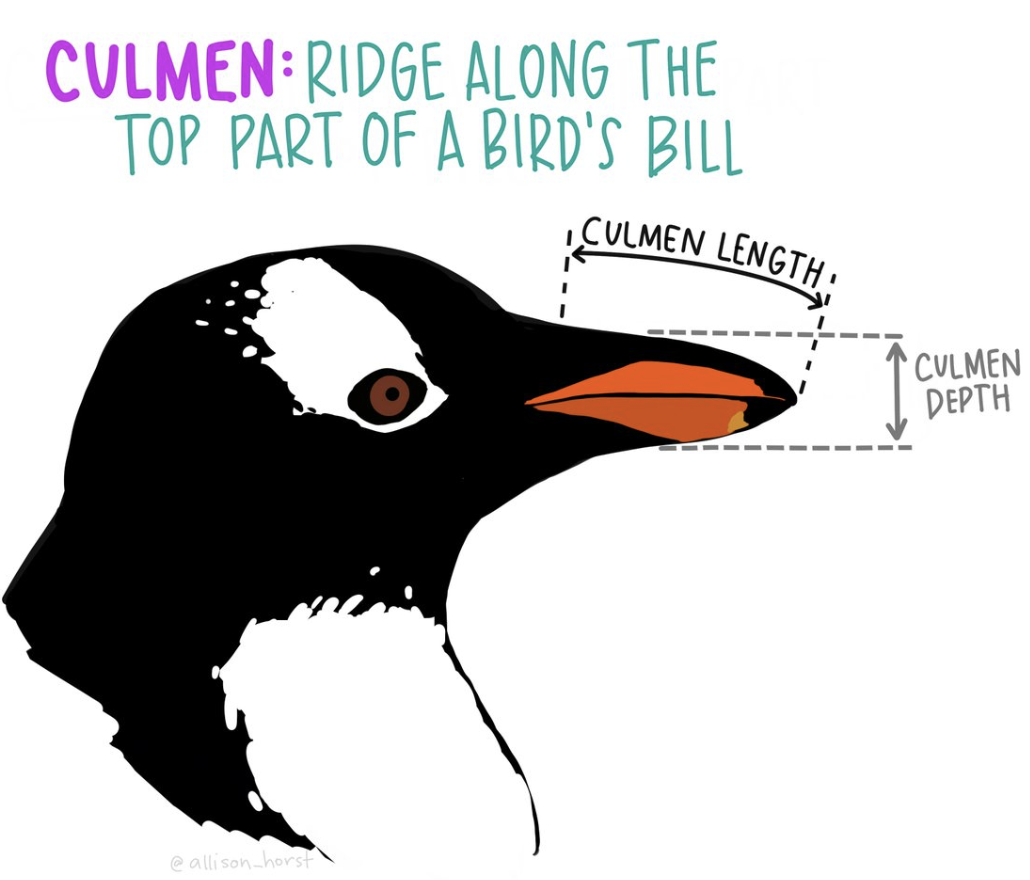

In [33]:
data.shape

(344, 7)

In [34]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [35]:
# cont the missing values
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


### Droping Missing and NA Values

In [36]:
# drop and check again with the functions from above
data = data.dropna()
data.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
117,Adelie,Torgersen,37.3,20.5,199.0,3775.0,MALE
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,MALE


### Replacing with Some Value

In [37]:
# alternatively, replace them with a new value
data = pd.read_csv(r"C:\Users\denso\OneDrive\Skrivebord\CPH\Datamatiker\Flows\4.sem\BI\penguins.csv")
data = data.fillna(0)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [38]:
data['sex'].value_counts().index[1]

'FEMALE'

In [39]:
# better way
data = pd.read_csv(r"C:\Users\denso\OneDrive\Skrivebord\CPH\Datamatiker\Flows\4.sem\BI\penguins.csv")

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)

data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


### Damaged Values

In [40]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [41]:
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [42]:
data = data.drop([336])
data.reset_index()

,index,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...
338,339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
339,340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
340,341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
341,342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


## Categorical Encoding

In [43]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [44]:
# assign a type
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')

In [45]:
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [46]:
cat_data = data.select_dtypes(exclude=[np.number]).columns

In [47]:
cat_data

Index(['species', 'island', 'sex'], dtype='object')

In [48]:
# categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
data[cat_data].head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


In [49]:
categorical_data = data[cat_data]
categorical_data

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,MALE
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


### Label Encoding

In [50]:
# digital coding of categorical data
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

C:\Users\denso\AppData\Local\Temp\ipykernel_26324\4135415351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["species_cat"] = categorical_data["species"].cat.codes
C:\Users\denso\AppData\Local\Temp\ipykernel_26324\4135415351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["island_cat"] = categorical_data["island"].cat.codes
C:\Users\denso\AppData\Local\Temp\ipykernel_26324\4135415351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


In [51]:
# drop columns
categorical_data = categorical_data.drop(['species_cat', 'sex_cat', 'island_cat'], axis=1)
categorical_data

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,MALE
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


### One-Hot Encoding

In [52]:
encoded_species = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

In [53]:
categorical_data.reset_index()

,index,species,island,sex
0,0,Adelie,Torgersen,MALE
1,1,Adelie,Torgersen,FEMALE
2,2,Adelie,Torgersen,FEMALE
3,3,Adelie,Torgersen,MALE
4,4,Adelie,Torgersen,FEMALE
...,...,...,...,...
338,339,Gentoo,Biscoe,MALE
339,340,Gentoo,Biscoe,FEMALE
340,341,Gentoo,Biscoe,MALE
341,342,Gentoo,Biscoe,FEMALE


In [54]:
categorical_data = categorical_data.join(encoded_species)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

In [55]:
categorical_data.head()

,species,island,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,True,False,False,False,False,True,False,True
1,Adelie,Torgersen,FEMALE,True,False,False,False,False,True,True,False
2,Adelie,Torgersen,FEMALE,True,False,False,False,False,True,True,False
3,Adelie,Torgersen,MALE,True,False,False,False,False,True,False,True
4,Adelie,Torgersen,FEMALE,True,False,False,False,False,True,True,False


### Count Encoding

In [56]:
# count appearance
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

categorical_data

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc
0,Adelie,Torgersen,MALE,152,52,178
1,Adelie,Torgersen,FEMALE,152,52,165
2,Adelie,Torgersen,FEMALE,152,52,165
3,Adelie,Torgersen,MALE,152,52,178
4,Adelie,Torgersen,FEMALE,152,52,165
...,...,...,...,...,...,...
339,Gentoo,Biscoe,MALE,123,167,178
340,Gentoo,Biscoe,FEMALE,123,167,165
341,Gentoo,Biscoe,MALE,123,167,178
342,Gentoo,Biscoe,FEMALE,123,167,165


In [57]:
species_count

species
Adelie       152
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

### Target Encoding

In [58]:
# splitting into categories and calculating mean for each
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

categorical_data["species"] = categorical_data["species"].cat.codes

island_means = categorical_data.groupby('island')['species'].mean()
sex_means = categorical_data.groupby('sex')['species'].mean()

In [59]:
island_means

island
Biscoe       1.473054
Dream        0.548387
Torgersen    0.000000
Name: species, dtype: float64

In [60]:
sex_means

sex
FEMALE    0.909091
MALE      0.921348
Name: species, dtype: float64

In [61]:
# replace all categorical with the means per category
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

,species,island,sex,island_target_enc,sex_target_enc
0,0,Torgersen,MALE,0.000000,0.921348
1,0,Torgersen,FEMALE,0.000000,0.909091
2,0,Torgersen,FEMALE,0.000000,0.909091
3,0,Torgersen,MALE,0.000000,0.921348
4,0,Torgersen,FEMALE,0.000000,0.909091
...,...,...,...,...,...
339,2,Biscoe,MALE,1.473054,0.921348
340,2,Biscoe,FEMALE,1.473054,0.909091
341,2,Biscoe,MALE,1.473054,0.921348
342,2,Biscoe,FEMALE,1.473054,0.909091


## Detecting and Handling Outliers

In [62]:
data["species"] = data["species"].cat.codes

In [63]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,2,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,2,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,2,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,2,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


<Axes: xlabel='species', ylabel='body_mass_g'>

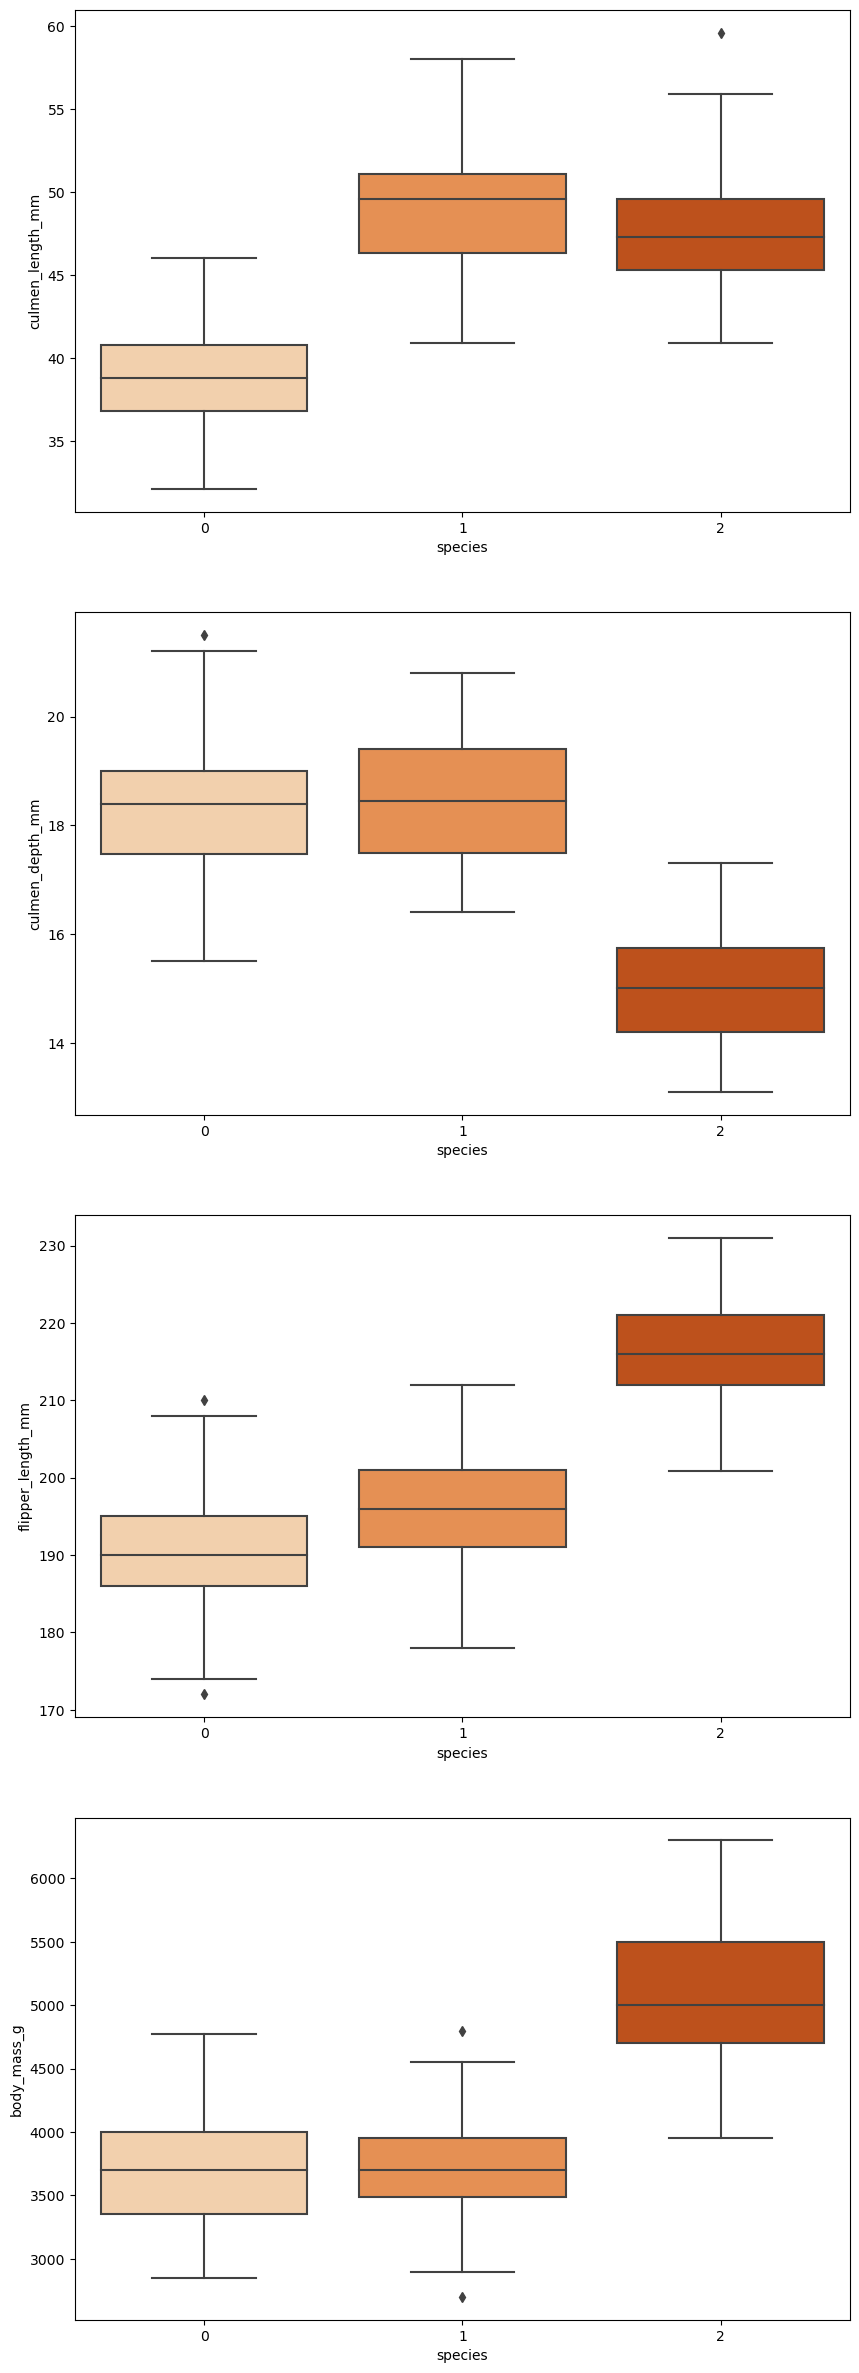

In [64]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

### Using Standard Deviation

In [65]:
factor = 0.5
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
9,0,Torgersen,42.00000,20.20000,190.000000,4250.000000,MALE
17,0,Torgersen,42.50000,20.70000,197.000000,4500.000000,MALE
19,0,Torgersen,46.00000,21.50000,194.000000,4200.000000,MALE
37,0,Dream,42.20000,18.50000,180.000000,3550.000000,FEMALE
...,...,...,...,...,...,...,...
328,2,Biscoe,43.30000,14.00000,208.000000,4575.000000,FEMALE
332,2,Biscoe,43.50000,15.20000,213.000000,4650.000000,FEMALE
334,2,Biscoe,46.20000,14.10000,217.000000,4375.000000,FEMALE
339,2,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE


### Using Percentilles

In [66]:
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,2,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,2,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,2,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,2,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [67]:
outliers = pd.concat([data,no_outliers]).drop_duplicates(keep=False)
outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,0,Torgersen,34.1,18.1,193.0,3475.0,MALE
14,0,Torgersen,34.6,21.1,198.0,4400.0,MALE
18,0,Torgersen,34.4,18.4,184.0,3325.0,FEMALE
25,0,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
52,0,Biscoe,35.0,17.9,190.0,3450.0,FEMALE
54,0,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
60,0,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
66,0,Biscoe,35.5,16.2,195.0,3350.0,FEMALE
70,0,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
74,0,Torgersen,35.5,17.5,190.0,3700.0,FEMALE


## Binning

In [68]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

C:\Users\denso\AppData\Local\Temp\ipykernel_26324\2893054784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])


,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Mid
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,43.92193,Mid
340,46.80000,Mid
341,50.40000,High
342,45.20000,Mid


## Scaling

In [69]:
# get statistics
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\2617817220.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scaled_data['body_mass_g'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});


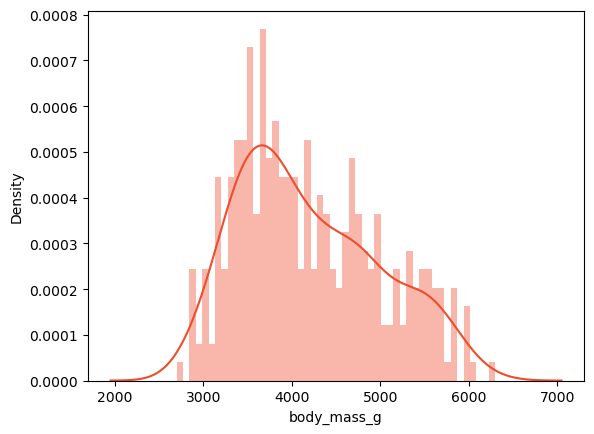

In [70]:
# draw histogram to visualize them
sb.distplot(scaled_data['body_mass_g'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Standard Scalling

In [71]:
# reduce all with the mean and scale data to unit variance
# x = (x-xmin)/std
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean()) # almost 0
print('Standard Deviation:', scaled_data['body_mass_scaled'].std()) # almost 1

Mean: -8.286212661925366e-17
Standard Deviation: 1.0014609211587777


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\3474998792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\1234628875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scaled_data['body_mass_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});


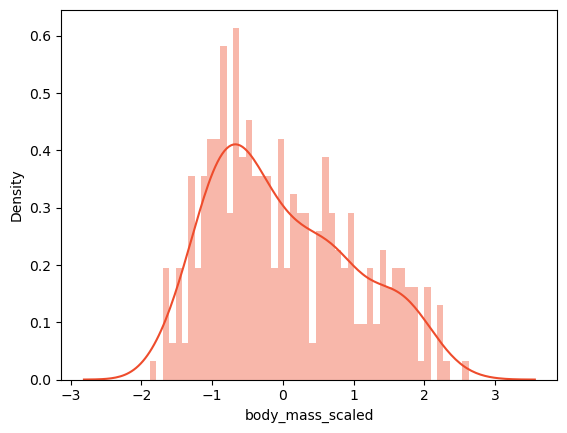

In [72]:
# histogram has same shape, but 0,0 is in the middle
sb.distplot(scaled_data['body_mass_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Min-Max Scalling - Normalization

In [73]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.41660876965656773
Standard Deviation: 0.2222085746778217


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\934457736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\1743719251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scaled_data['body_mass_min_max_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});


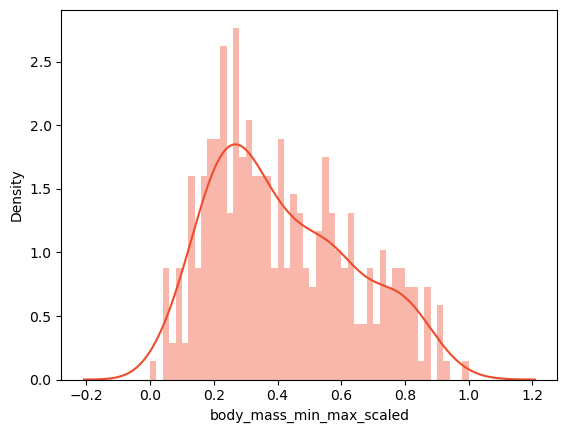

In [74]:
# values are in [0, 1]
sb.distplot(scaled_data['body_mass_min_max_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

In [75]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.5003068896731625
Standard Deviation: 0.2899470129457298


c:\Users\denso\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\denso\AppData\Local\Temp\ipykernel_26324\3933579211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\3246364369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scaled_data['body_mass_q_trans_uniform'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});


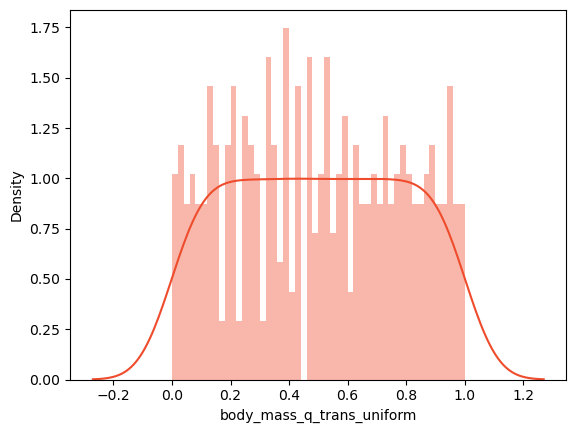

In [76]:
sb.distplot(scaled_data['body_mass_q_trans_uniform'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Transform Into Normal Distribution

In [77]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

Mean: 0.0012074951683245796
Standard Deviation: 1.0603588849546568


c:\Users\denso\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\denso\AppData\Local\Temp\ipykernel_26324\1214033699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


C:\Users\denso\AppData\Local\Temp\ipykernel_26324\3852492349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(scaled_data['body_mass_q_trans_normal'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});


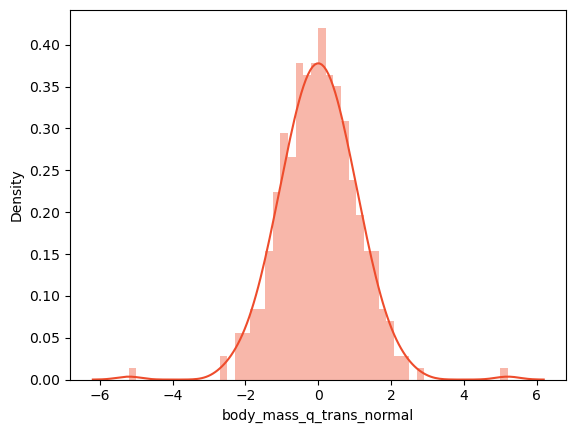

In [78]:
sb.distplot(scaled_data['body_mass_q_trans_normal'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

In [79]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_q_trans_uniform,body_mass_q_trans_normal
0,3750.000000,-0.563095,0.291667,0.356725,-0.367226
1,3800.000000,-0.500500,0.305556,0.394737,-0.266994
2,3250.000000,-1.189047,0.152778,0.087719,-1.354934
3,4201.754386,0.002457,0.417154,0.565789,0.165664
4,3450.000000,-0.938666,0.208333,0.185673,-0.893957
...,...,...,...,...,...
339,4201.754386,0.002457,0.417154,0.565789,0.165664
340,4850.000000,0.813998,0.597222,0.773392,0.750064
341,5750.000000,1.940711,0.847222,0.967836,1.849903
342,5200.000000,1.252164,0.694444,0.853801,1.052876


## Feature Selection

In [80]:
# selecting the k most informative features related to the output
feature_sel_data = data.drop(['species'], axis=1)

feature_sel_data["island"] = feature_sel_data["island"].cat.codes
feature_sel_data["sex"] = feature_sel_data["sex"].cat.codes

# Use 3 features
selector = SelectKBest(f_classif, k=3)

selected_data = selector.fit_transform(feature_sel_data, data['species'])
selected_data

array([[ 39.1,  18.7, 181. ],
       [ 39.5,  17.4, 186. ],
       [ 40.3,  18. , 195. ],
       ...,
       [ 50.4,  15.7, 222. ],
       [ 45.2,  14.8, 212. ],
       [ 49.9,  16.1, 213. ]])

In [81]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [82]:
# convert from numpy to df
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), index=data.index, 
                                 columns=feature_sel_data.columns)

In [83]:
# see the selected features
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,39.10000,18.70000,181.000000
1,39.50000,17.40000,186.000000
2,40.30000,18.00000,195.000000
3,43.92193,17.15117,200.915205
4,36.70000,19.30000,193.000000


## Feature Grouping

### Numerical Grouping

In [84]:
grouped_data = data.groupby('species')

sums_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].sum().add_suffix('_sum')
avgs_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].mean().add_suffix('_mean')

sumed_averaged = pd.concat([sums_data, avgs_data], axis=1)
sumed_averaged

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

### Categorical Grouping

In [ ]:
# fill_value for NaN
pivot = data.pivot_table(index='species', columns='sex', values='culmen_length_mm', aggfunc=np.mean, fill_value=0)
pivot

# Reference
https://rubikscode.net/2020/11/15/top-9-feature-engineering-techniques/